# Building Logistic Regression & Decision Tree Classification Models to Predict Pass or Fail

## Our goal
To build classification models that will help predict if a student in a given class will pass or fail depending on multiple categories that apply to each student. Our dataset is comprised of 649 students and 33 categories for each student. We will be splitting the dataset into a testing and a training dataset to avoid any influence or bias from the training dataset onto the testing dataset when the models are being trained. The main Python packages used for this project include pandas, os, NumPy, graphviz, and scikit-learn.

---------

In [1]:
import pandas as pd
import numpy as np
import os
import graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
import itertools
np.random.seed(seed=1)
%matplotlib inline

/Users/sammyhajomar/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Loading The Data

In [2]:
file_path = os.path.join(os.getcwd(), 'student', 'student-por.csv')
student_data = pd.read_csv(file_path, sep=';')
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Describing The Data

The data set has 649 rows and 33 columns
Each row has 0 null values (This does not insure no empty values, because it could have "?" or "nan" as values)
Our predictand is G3 (final grade to determine pass or fail)
Attribute Examples:
- Binary Categories: school, activities, nursery, higher, internet, sex
- Ordinal Categories: traveltime, studytime, Fedu, Medu
- Nominal Categories: Mjob, Fjob, reason, guardian
- Continuous Features: age, absences, famrel, freetime, goout

In [3]:
student_data.info()
student_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


# Exploring The Data

In [4]:
# Here, we are dropping columns G1 & G2, which are the grades for the first half & second half of the
# class, respectively. This is done because we are building a model to forecast the pass or fail of a student
# before they start the class and G1 & G2 are data points collected after the class has already started. 
# We are also creating a new 'pass' column to see which students passed or failed, which will be later use in our
# data exploration.
student_data.drop(['G1', 'G2'], axis=1, inplace=True)
student_data['pass'] = 0
student_data.loc[student_data['G3'] >= 10, 'pass'] = 1
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,13,1


In [5]:
# Separating our data into a training set and a testing set
train_df, test_df = train_test_split(student_data, test_size=0.25, random_state=9)
print(train_df.shape)
print(test_df.shape)

# Saving our training and testing data sets

# Training Set
train_save_path = os.path.join(os.getcwd(), 'student', 'student-por-train.csv')
train_df.to_csv(train_save_path, index=False)

# Testing Set
test_save_path = os.path.join(os.getcwd(), 'student', 'student-por-test.csv')
test_df.to_csv(test_save_path, index=False)

(486, 32)
(163, 32)


In [6]:
# Exploring our G3 column to get some more insight into the students that passed or failed
# From this data I can tell that 75% of the class had a grade of 10 or more, which means
# they passed the class
train_df['G3'].describe()

count    486.000000
mean      11.820988
std        3.324829
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

Text(0.5, 0, 'Final Grade')

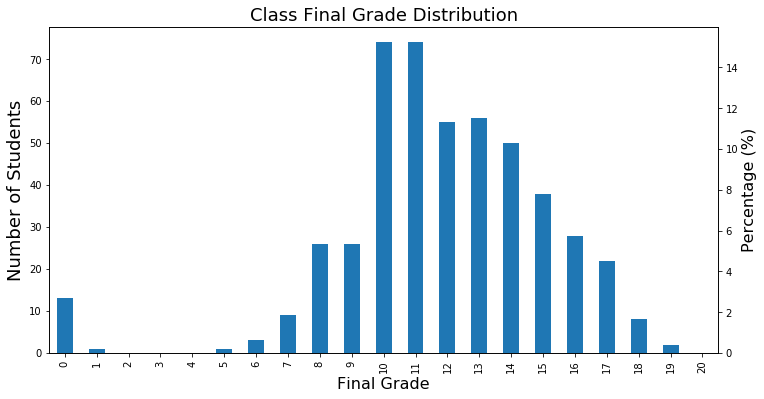

In [7]:
# Creating a bar plot to visualize the G3 column within the training data
# We used a for loop to add the values 1-4 & 20 that have 0 frequency

final_grade = train_df['G3'].value_counts()

for fg in range(0, 21):
    if fg not in final_grade.index:
        final_grade.loc[fg] = 0
        
final_grade.sort_index(inplace=True)

# Creating the bar plot
fig, ax1 = plt.subplots(1, 1, figsize=(12,6))
final_grade.plot(ax=ax1, kind='bar')

# Creating second Y axis to display percentages
ax2 = ax1.twinx()
num_rows = train_df['G3'].shape[0]
final_grade_percents = final_grade/num_rows * 100
final_grade_percents.plot(ax=ax2, kind='bar')

ax1.set_title("Class Final Grade Distribution", fontsize=18)
ax1.set_ylabel("Number of Students", fontsize=18)
ax2.set_ylabel('Percentage (%)', fontsize=16)
ax1.set_xlabel('Final Grade', fontsize=16)

# Notes about the plot:
    # Outlier at zero grade of 10 students. Continued exploration needed to decipher
    # A rough standard distribution of grades with a mean of around 12 out of 20

Text(0, 0.5, 'Percentage of Students (%)')

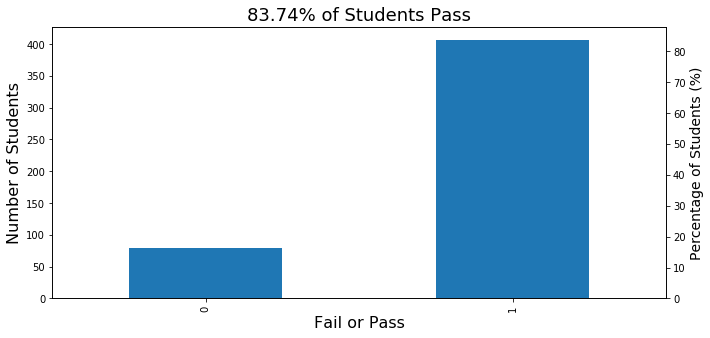

In [8]:
# Visualizing Pass/Fail Rate
fig, ax1 = plt.subplots(1, 1, figsize=(11, 5))
train_df['pass'].value_counts().sort_index().plot(kind='bar', ax=ax1)
ax2 = ax1.twinx()
pass_fail_prct = (train_df['pass'].value_counts().sort_index()/num_rows) * 100
pass_fail_prct.plot(kind='bar', ax=ax2)

ax1.set_title('{:.2f}% of Students Pass'.format(pass_fail_prct[1]), fontsize=18)
ax1.set_xlabel('Fail or Pass', fontsize=16)
ax1.set_ylabel('Number of Students', fontsize=16)
ax2.set_ylabel('Percentage of Students (%)', fontsize=14)

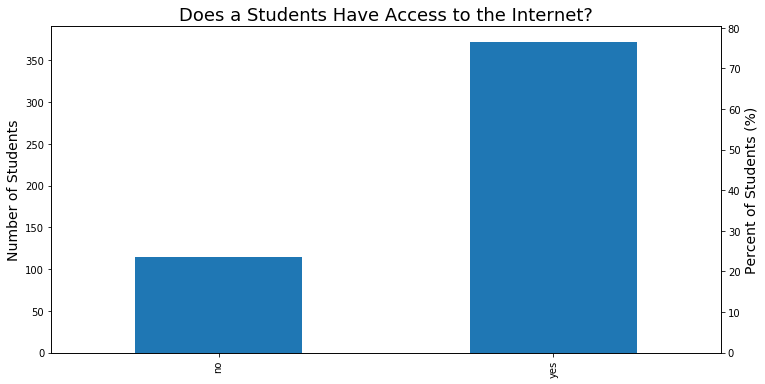

In [9]:
# Visualizing The Internet Feature Distribution as an example

fig, ax1 = plt.subplots(1, 1, figsize=(12,6))
train_df['internet'].value_counts().sort_index().plot(ax=ax1, kind='bar')
ax1.set_title('Does a Students Have Access to the Internet?', fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df['internet'].value_counts().sort_index()/num_rows)*100
prct_class.plot(kind='bar', ax=ax2)
ax1.set_ylabel('Number of Students', fontsize=14)
_ = ax2.set_ylabel('Percent of Students (%)', fontsize=14)

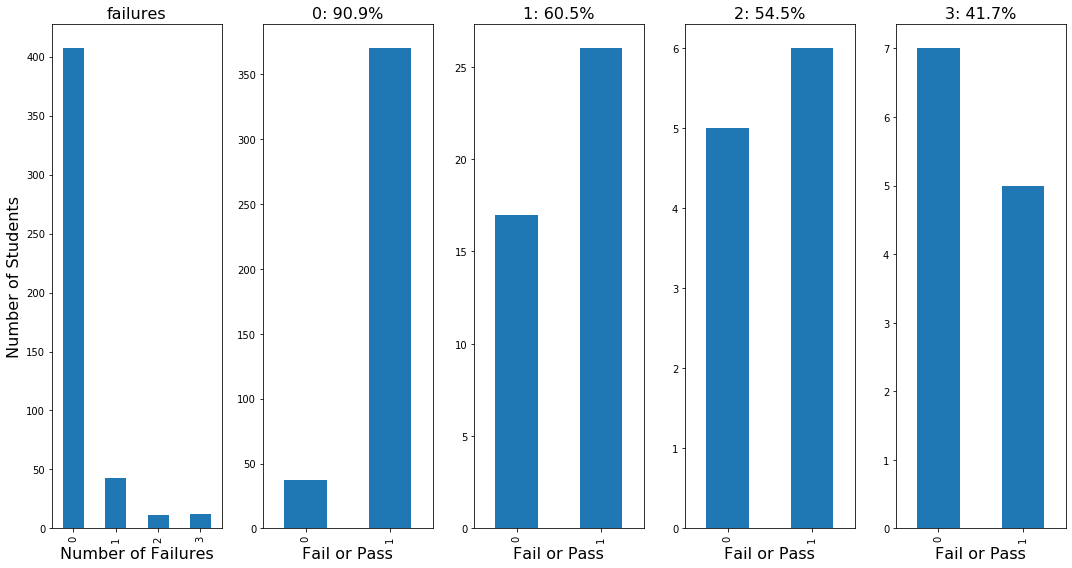

In [10]:
# Visualizing fail/pass rate with respect to the number of failures 0 through 4

# Creating variable that is the training data set without outliers that are 
# about 10 students with a 0 score out of 20
removed_outliers = train_df[train_df['G3'] > 0]

# Plotting first bar chart and setting up the axis of the rest
col = 'failures'
classes = sorted(removed_outliers[col].unique())
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
removed_outliers[col].value_counts().sort_index().plot(ax=axs[0], kind='bar')
axs[0].set_title(col, fontsize=16)
axs[0].set_xlabel('Number of Failures', fontsize=16)
axs[0].set_ylabel('Number of Students', fontsize=16)

# Plotting the rest of the bar charts aside from the first
for counter, cl in enumerate(classes):
    pass_fail_counts = (removed_outliers.loc[train_df[col] == cl, 'pass'].value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    percent_pass = removed_outliers.loc[removed_outliers[col] == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.1f}%'.format(cl, percent_pass), fontsize=16)
    axs[counter+1].set_xlabel('Fail or Pass', fontsize=16)
# For styling
fig.tight_layout()
    

Text(0.5, 1.0, 'Student Absences')

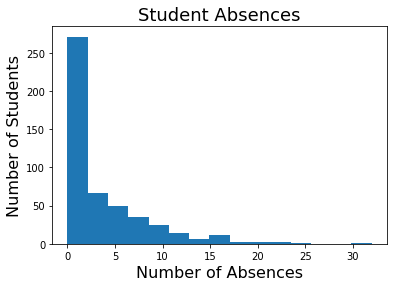

In [11]:
# Plotting a continuous feature with respect to  pass/fail
# Plotting a binary feature (pass/fail) with respect to a continuous feature (absences)
# using a binary feature distribution
train_df['absences'].plot(kind='hist', bins=15)
plt.xlabel('Number of Absences', fontsize=16)
plt.ylabel('Number of Students', fontsize=16)
plt.title('Student Absences', fontsize=18)

In [12]:
np.percentile(train_df['absences'], [0, 20, 40, 60, 80, 100])

array([ 0.,  0.,  2.,  4.,  7., 32.])

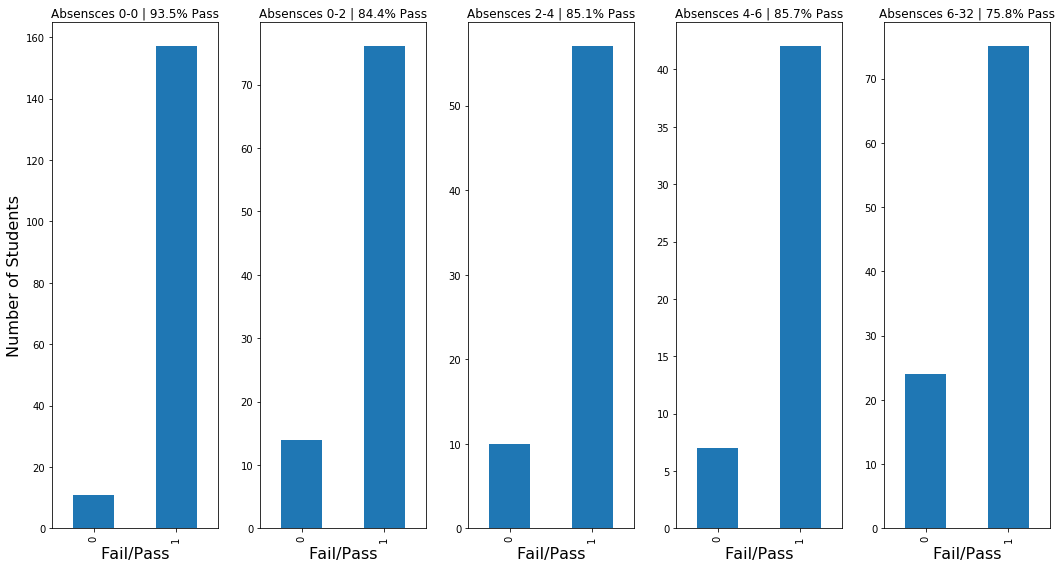

In [13]:
fig, axs = plt.subplots(1, 5, figsize=(15, 8))

counter = 0
for firstb, lastb in [(0, 0), (0, 2), (2, 4), (4, 6), (6, 32)]:
    if (firstb == 0) and (lastb == 0):
        (removed_outliers.loc[(train_df['absences'] == firstb), 'pass'].value_counts().
         sort_index().plot(ax=axs[counter], kind='bar'))
        percent_pass = removed_outliers.loc[(train_df['absences'] == firstb), 'pass'].mean()*100
    
    else:
        (train_df.loc[(train_df['absences'] > firstb) & (train_df['absences'] <= lastb), 'pass'].value_counts().
         sort_index().plot(ax=axs[counter], kind='bar'))
        percent_pass = train_df.loc[(train_df['absences'] > firstb) & (train_df['absences'] <= lastb), 'pass'].mean()*100
    
    axs[counter].set_title('Absensces {}-{} | {:.1f}% Pass'.format(firstb, lastb, percent_pass))
    axs[counter].set_xlabel('Fail/Pass', fontsize=16)
    axs[0].set_ylabel('Number of Students', fontsize=16)
    counter += 1
    
fig.tight_layout()
# A few notes about the below:
    # As the number of absences increase we see a decline in the pass rate
    # The 4th chart isn't consistent with the trend because it has less failures than
    # the charts before it and therefore we cannot make a definitive conclusion about
    # the number of failures increasing as absences increase. 
    # The key thing to keep in mind is the number is different than the rate since each
    # bin has a different number of students.


# Building The Models

## Logistic Regression Model

In [14]:
# Dummy Encoding the Data
# Coverting categorical data to numerical dummy variables
train_dummies_df = pd.get_dummies(train_df, drop_first=True)
test_dummies_df = pd.get_dummies(test_df, drop_first=True)

# Separating training data into predictors and predictand
Use_Cols = [column for column in train_dummies_df.columns if column not in ['pass','G3']]
train_x = train_dummies_df[Use_Cols]
train_y = train_dummies_df['pass']

# Separating testing data into predictors and predictand
test_x = test_dummies_df[Use_Cols]
test_y = test_dummies_df['pass']

In [15]:
# Mean Standardizing the Data
train_x_standardized = ((train_x - train_x.mean()) / train_x.std())
test_x_standardized = ((test_x - train_x.mean()) / train_x.std())

In [16]:
# Removing outlier 0 values
train_x_standardized_no0s = train_x_standardized.loc[train_dummies_df['G3'] > 0, :]
train_y_no0s = train_y.loc[train_dummies_df['G3'] > 0]

test_x_standardized_no0s = test_x_standardized.loc[test_dummies_df['G3'] > 0, :]
test_y_no0s = test_y.loc[test_dummies_df['G3'] > 0]

0.8646747853676746
[0.04584824]


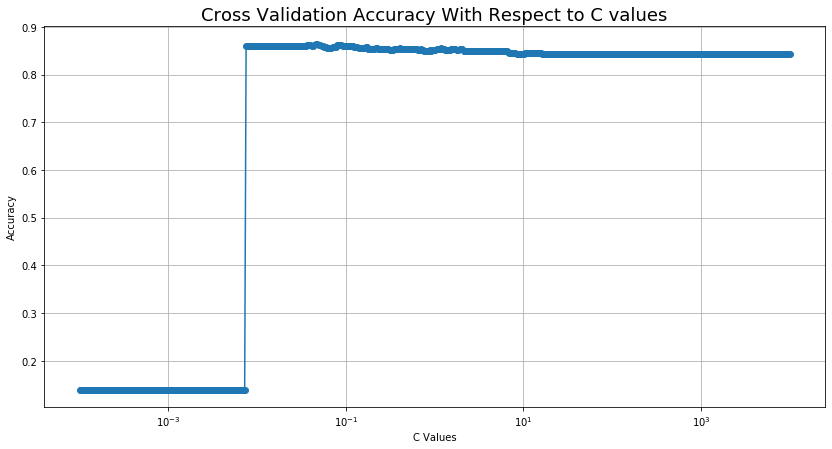

In [17]:
# Creating the logistic regression CV object.  Using the 'l1' penalty, settting the number
# of folds to 5, and the solver to 'liblinear'
logRegCVSDNo0s = LogisticRegressionCV(Cs=500, penalty='l1', cv=5, solver='liblinear')

# Fitting the model
logRegCVSDNo0s.fit(train_x_standardized_no0s, train_y_no0s)

# Plotting the CV Accuracy with respect to C values
fig, axs = plt.subplots(1, 1, figsize=(14, 7))
axs.plot(logRegCVSDNo0s.Cs_, logRegCVSDNo0s.scores_[1].mean(axis=0), marker='o')
axs.set_xscale('log')
axs.set_title('Cross Validation Accuracy With Respect to C values', fontsize=18)
axs.set_xlabel('C Values')
axs.set_ylabel('Accuracy')
axs.grid()
print(logRegCVSDNo0s.scores_[1].mean(axis=0).max())
print(logRegCVSDNo0s.C_)

## Decision Tree Model

In [18]:
# Dummy Encode the Data 
# Coverting categorical data to numerical dummy variables but without drop first method
train_dummies_df_dt = pd.get_dummies(train_df)
test_dummies_df_dt = pd.get_dummies(test_df)

# Separating training data into predictors and predictand
Use_Cols_dt = [column for column in train_dummies_df_dt.columns if column not in ['pass','G3']]
train_x_dt = train_dummies_df_dt[Use_Cols_dt]
train_y_dt = train_dummies_df_dt['pass']

# Separating testing data into predictors and predictand
test_x_dt = test_dummies_df_dt[Use_Cols_dt]
test_y_dt = test_dummies_df_dt['pass']  

In [19]:
# First create a classifier, specifying any arguments that we want to be fixed
# during the testing.
classifier = DecisionTreeClassifier(random_state=5)

# Create a dictionary of the differen paramters and ranges we would like to test.
parameters = {'min_samples_leaf': range(5, 101)}

# Then, create the GridSearchCV object, with the model and the paramters, also
# specify the number of cv folds. If we want the score on the trianing set to
# recorded, we set this to true.
gsCV = GridSearchCV(classifier, parameters, cv=5, return_train_score=True)

# Then train the model. The model will then perform the cross-validation loop
# for every hyper-paramter combination we want to test.
gsCV.fit(X=train_x_dt, y=train_y_dt)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=5,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 101)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
   

In [20]:
print(gsCV.best_params_)
bestTree = gsCV.best_estimator_

graphiv_string = export_graphviz(bestTree, out_file=None, filled=True, rounded=True,
                                 feature_names=train_x_dt.columns)
graph = graphviz.Source(graphiv_string, format='png')

image_savepath = os.path.join(os.getcwd(), 'dt_3')
graph.render(image_savepath)

{'min_samples_leaf': 29}


'/Users/sammyhajomar/Desktop/Python Practice/Data Prep-Visz-Mod/Getting it to Github/dt_3.png'

# Evaluating The Performance of Both Models

## Logistic Regression Model

In [21]:
# Printing the coefficients that were upheld
print(logRegCVSDNo0s.coef_)

# Printing the columns that correspond to the non-zero coefficients
for coef, col in zip(logRegCVSDNo0s.coef_[0], train_x.columns):
    if coef != 0:
        print('{:.3f} * {}'.format(coef, col))

print('We have reduced from {} features to {}'.
      format(train_x_standardized_no0s.shape[1],
             sum(logRegCVSDNo0s.coef_[0] != 0)))

[[ 0.          0.          0.          0.          0.         -0.33194142
   0.          0.          0.          0.          0.          0.
  -0.0148823  -0.13144258  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.11306355  0.          0.        ]]
-0.332 * failures
-0.015 * absences
-0.131 * school_MS
0.113 * higher_yes
We have reduced from 39 features to 4


In [22]:
# Measuring and comparing the performance of our model on two different test set. test_y with the outlier zeros and
# test_y_no0s without the outliers and we can see the one without the outliers is slightly more accurate at 88.82%
logRegSDAccuracyNo0s = accuracy_score(logRegCVSDNo0s.predict(test_x_standardized), test_y)
logRegSDAccuracyNo0s_TestNo0s = accuracy_score(logRegCVSDNo0s.predict(test_x_standardized_no0s), test_y_no0s)
print('logRegCVSDNo0s has an accuracy {:.2f}% on the test set.'.format(logRegSDAccuracyNo0s*100))
print('logRegCVSDNo0s has an accuracy {:.2f}% on the "No 0s" test set.'.format(logRegSDAccuracyNo0s_TestNo0s*100))

logRegCVSDNo0s has an accuracy 87.73% on the test set.
logRegCVSDNo0s has an accuracy 88.82% on the "No 0s" test set.


In [23]:
# Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    #plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  1  20]
 [  0 142]]


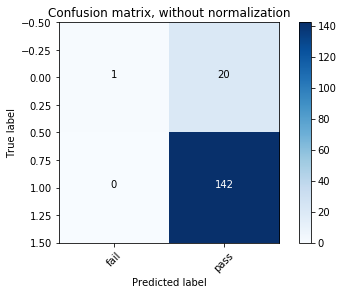

In [24]:
# Computing the confusion matrix
cnf_matrix = confusion_matrix(test_y, logRegCVSDNo0s.predict(test_x_standardized))

# Plotting the confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['fail', 'pass'],
                      title='Confusion matrix, without normalization')

In [25]:
# Classification Report
print(classification_report(test_y, logRegCVSDNo0s.predict(test_x_standardized)))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09        21
           1       0.88      1.00      0.93       142

    accuracy                           0.88       163
   macro avg       0.94      0.52      0.51       163
weighted avg       0.89      0.88      0.83       163



## Decision Tree Model

In [26]:
# These are the results from training our decision tree model
grid_search_results = pd.DataFrame(gsCV.cv_results_)
grid_search_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005947,0.001715,0.002177,0.001155,5,{'min_samples_leaf': 5},0.785714,0.816327,0.731959,0.793814,...,0.783951,0.027977,96,0.896907,0.907216,0.915167,0.910026,0.917949,0.909453,0.007315
1,0.004107,0.000914,0.001134,0.000054,6,{'min_samples_leaf': 6},0.795918,0.826531,0.731959,0.804124,...,0.796296,0.034099,93,0.889175,0.899485,0.899743,0.899743,0.912821,0.900193,0.007507
2,0.004089,0.000884,0.001456,0.000330,7,{'min_samples_leaf': 7},0.816327,0.816327,0.742268,0.793814,...,0.792181,0.027073,94,0.889175,0.889175,0.894602,0.894602,0.894872,0.892485,0.002704
3,0.004350,0.000658,0.001544,0.000508,8,{'min_samples_leaf': 8},0.806122,0.816327,0.711340,0.824742,...,0.790123,0.040848,95,0.884021,0.881443,0.889460,0.889460,0.894872,0.887851,0.004695
4,0.003765,0.000187,0.001354,0.000441,9,{'min_samples_leaf': 9},0.826531,0.816327,0.711340,0.824742,...,0.798354,0.043760,91,0.884021,0.881443,0.889460,0.889460,0.889744,0.886826,0.003442
5,0.003567,0.000142,0.001151,0.000082,10,{'min_samples_leaf': 10},0.826531,0.826531,0.742268,0.835052,...,0.812757,0.035370,86,0.884021,0.873711,0.886889,0.879177,0.882051,0.881170,0.004499
6,0.003574,0.000267,0.001105,0.000028,11,{'min_samples_leaf': 11},0.826531,0.826531,0.701031,0.814433,...,0.800412,0.049997,90,0.881443,0.873711,0.881748,0.874036,0.882051,0.878598,0.003864
7,0.003357,0.000049,0.001140,0.000062,12,{'min_samples_leaf': 12},0.795918,0.826531,0.701031,0.824742,...,0.798354,0.050969,91,0.873711,0.873711,0.881748,0.871465,0.869231,0.873973,0.004228
8,0.004477,0.000969,0.001456,0.000350,13,{'min_samples_leaf': 13},0.795918,0.846939,0.701031,0.824742,...,0.802469,0.053822,89,0.873711,0.865979,0.881748,0.868895,0.869231,0.871913,0.005504
9,0.004960,0.001883,0.001780,0.000736,14,{'min_samples_leaf': 14},0.826531,0.867347,0.701031,0.793814,...,0.808642,0.059363,88,0.858247,0.865979,0.881748,0.861183,0.874359,0.868303,0.008656


In [27]:
# Sorting the dataframe based on rank_test_score
grid_search_results.loc[grid_search_results['rank_test_score']<=10, :].sort_values('rank_test_score').head(10)
# The best min_samples_leaf equals 29 here with a rank_test_score of 1 and a mean_train_score of 0.847

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
24,0.003189,0.000179,0.001119,0.000021,29,{'min_samples_leaf': 29},0.846939,0.846939,0.835052,0.835052,...,0.847737,0.014537,1,0.855670,0.855670,0.838046,0.838046,0.848718,0.847230,0.007917
22,0.003250,0.000249,0.001120,0.000062,27,{'min_samples_leaf': 27},0.846939,0.846939,0.855670,0.824742,...,0.841564,0.011010,2,0.855670,0.855670,0.850900,0.861183,0.856410,0.855967,0.003263
23,0.003221,0.000236,0.001138,0.000079,28,{'min_samples_leaf': 28},0.846939,0.846939,0.855670,0.824742,...,0.841564,0.011010,2,0.855670,0.855670,0.850900,0.861183,0.856410,0.855967,0.003263
76,0.002656,0.000057,0.001208,0.000173,81,{'min_samples_leaf': 81},0.836735,0.836735,0.835052,0.835052,...,0.837449,0.003216,4,0.837629,0.837629,0.838046,0.838046,0.835897,0.837450,0.000798
77,0.006272,0.001559,0.002631,0.001038,82,{'min_samples_leaf': 82},0.836735,0.836735,0.835052,0.835052,...,0.837449,0.003216,4,0.837629,0.837629,0.838046,0.838046,0.835897,0.837450,0.000798
78,0.002875,0.000238,0.001155,0.000070,83,{'min_samples_leaf': 83},0.836735,0.836735,0.835052,0.835052,...,0.837449,0.003216,4,0.837629,0.837629,0.838046,0.838046,0.835897,0.837450,0.000798
79,0.003003,0.000443,0.001128,0.000066,84,{'min_samples_leaf': 84},0.836735,0.836735,0.835052,0.835052,...,0.837449,0.003216,4,0.837629,0.837629,0.838046,0.838046,0.835897,0.837450,0.000798
80,0.002958,0.000152,0.001581,0.000807,85,{'min_samples_leaf': 85},0.836735,0.836735,0.835052,0.835052,...,0.837449,0.003216,4,0.837629,0.837629,0.838046,0.838046,0.835897,0.837450,0.000798
81,0.002574,0.000052,0.001126,0.000074,86,{'min_samples_leaf': 86},0.836735,0.836735,0.835052,0.835052,...,0.837449,0.003216,4,0.837629,0.837629,0.838046,0.838046,0.835897,0.837450,0.000798
82,0.003622,0.001715,0.001114,0.000061,87,{'min_samples_leaf': 87},0.836735,0.836735,0.835052,0.835052,...,0.837449,0.003216,4,0.837629,0.837629,0.838046,0.838046,0.835897,0.837450,0.000798


In [28]:
# Finding the accuracy on the training data
train_data_accuracy_dt = accuracy_score(bestTree.predict(train_x_dt), train_y_dt)

# Finding the accuracy on the testing data
test_data_accuracy_dt = accuracy_score(bestTree.predict(test_x_dt) , test_y_dt)

print('The accuracy on the training data is {:.0f}%'.format(train_data_accuracy_dt*100))
print('The accuracy on the testing data is {:.0f}%'.format(test_data_accuracy_dt*100))

The accuracy on the training data is 85%
The accuracy on the testing data is 88%


Confusion matrix, without normalization
[[  6  15]
 [  4 138]]
              precision    recall  f1-score   support

           0       0.60      0.29      0.39        21
           1       0.90      0.97      0.94       142

    accuracy                           0.88       163
   macro avg       0.75      0.63      0.66       163
weighted avg       0.86      0.88      0.86       163



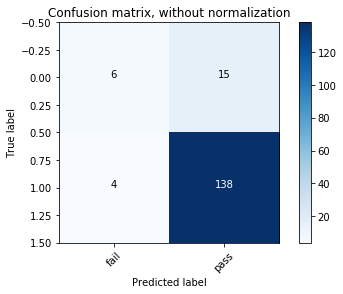

In [29]:
# Computing the Confusion Matrix
cnf_matrix = confusion_matrix(test_y_dt, bestTree.predict(test_x_dt))

# Plotting the Confusion Matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['fail', 'pass'],
                      title='Confusion matrix, without normalization')

# Classification Report
print(classification_report(test_y_dt, bestTree.predict(test_x_dt)))

Text(0.5, 1.0, 'ROC Curve')

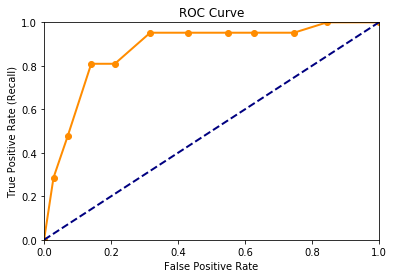

In [30]:
# Plotting ROC Curve
predicted_probs = bestTree.predict_proba(test_x_dt)

fpr, recall, thresolds = roc_curve(test_y_dt, predicted_probs[:, 0], pos_label=0)
fig, ax = plt.subplots(1, 1)
ax.plot(fpr, recall, color='darkorange', lw=2, linestyle='-', marker='o')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate (Recall)')
ax.set_title('ROC Curve')

# The threshold increases exponentially and it passes 0.8 we start seing a rapid increase in the false positive rate
# This model is very close to what a perfect model would look like with the curve shooting straight up with a high
# y value then once reaching 1.0 go straigh across the x axis (false positive rate).
# Ideally if there is a pass the predictive probability should equal 1 and not identifying any of the fails as passes

# Describing and Interpreting The Models

Here we make observations and draw conclusions by interpreting the results given to us by each model

## Logistic Regression Model

- Our model generated an accuracy of around 88.3% on our testing set which is significantly better that what was done previously in class, but one must also consider that there is a higher percentage of students that did pass in this data set and that increases the random percentage of choosing a student that passes.
- After being standardized and the data being cross validated, our model was able to drop 35 of the 39 features leaving us with 4 key features. 3 of the features negatively impacting students ability to pass and 1 feature helping the students pass. 
- Failures and abscences make logical sense to why students would have a harder time passing but the type of school they go to was a surprise. Going to Mousinho da Silveira school reduced their chances of passing.
- As for 'higer_yes' (students asipiring to go into higher education) it makes logical sense that students aspiring for higher education helps improve their chances of passing. 
- **Here are the coffiecients of each key feature (negative sign indicating negative impact of passing chances of student):**
    - -0.332 * failures
    - -0.015 * absences
    - -0.131 * school_MS
    - 0.113 * higher_yes
- **Derived from the confusion matrix:**
    - This model predicted 1 failures and 1 is actually a failure (True Negatives). None of the failures
    - the model predicted were actually passes (False Negatives).
    - The model predicted 162 students passed, but actually only 142 passed (True Positive) and
    - 20 actually failed (False Positive) Overall the model only predicted 1 out of 21 failures which is not optimal.
    - The model did predict 87.65% (142/162) of the students that would pass, which is a silver lining
- **Derived from the classification report:**
    - Our precision was pretty accurate at 100% for predicting failures & passes that actually happened
    - Our recall (detection) for failures was underwhelming at only 5%.
    - Our recall (detection) for passes was a perfect 100%


## Decision Tree Model

- The mother's education seemed to have an extremely low gini score indicating a big factor in determining if a student is likely to pass at gini = 0.037 as well as the mother's job wich had a gini score of 0.072.
- Students failures, attending Gabriel Pereira school, and romantic relationships had the biggest effect on the likelyhood of a student passing.
- The decision tree model on the other hand yielded a slightly lower accuracy of 88% compared to the 88.3% of the logisitc regression model, which based on that alone is not much of a difference considering we are not working with extremely large data sets.
- The best min_samples_leaf equals 29 here with a rank_test_score of 1 and a mean_train_score of 0.847
- **Derived from the confusion matrix:**
    - The model predicted 10 students would fail and it was right on 6 (true negatives) and wrong on 4 (false negatives)
    - The model predicted 153 students would pass and it was correct on 138 (true positives) and wrong on 15 (false positives)
- **Derived from the classification report:**
    - The recall on the decision tree model is much better when compared to the logisitic regression model
    - The decision tree model has a recall of 0.29 while the logisitic regression model had a recall of 0.05
- **Derived from the ROC curve:**
    - The threshold increases exponentially and it passes 0.8 we start seing a rapid increase in the false positive rate
    - This model is very close to what a perfect model would look like with the curve shooting straight up with a high
    - y value then once reaching 1.0 go straigh across the x axis (false positive rate).
    - Ideally if there is a pass the predictive probability should equal 1 and not identifying any of the fails as passes